# Comparison of all conditions
In this Jupyter notebook we will graph out the average value across all five seeds for each condition and compare it with the control condition, graphing the results. 

## Quick links:
[set up the environment](#setup_environment)

### stat_fitness_global
[read in the data](#stat_fitness_global_read) || [graph the data](#stat_fitness_global_graph)<br>

### Calculate percent non-coding 
[read in stat_bp_best](#stat_bp_best_read) || [graph the data](#percent_noncoding)<br>

### stat_genes_global
[read in the data](#stat_genes_global_read) || [graph the data](#stat_genes_global_graph)<br>


## Set up the environment

<a id='setup_environment'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats
from functools import reduce
from MyFunctions import read_fitness, read_bp, read_genes, read_robustness, perc_diff, name, mean_format, rank_sum_format

# Laptop
#INPUT_ROOT_DIR = "C://Users//davis//Dropbox//Freiburg Masters Semesters//Thesis//Results//Round02//"

# Desktop
INPUT_ROOT_DIR = "D://Dropbox_New//Dropbox//Freiburg Masters Semesters//Thesis//Results//Round02//"

OUTPUT_ROOT_DIR = INPUT_ROOT_DIR + "Graphics//all_analysis//"
WINDOW_SIZE = 10000

print ("Setting up environment...")
# Make sure that the output directories exist and create them if not
if not os.path.exists(OUTPUT_ROOT_DIR):
    os.mkdir(OUTPUT_ROOT_DIR)
    
# stat_fitness_global
if not os.path.exists(OUTPUT_ROOT_DIR + "fitness_global//perc_change"):
    os.makedirs(OUTPUT_ROOT_DIR + "fitness_global//perc_change//")
if not os.path.exists(OUTPUT_ROOT_DIR + "fitness_global//num_and_perc_change//"):
    os.makedirs(OUTPUT_ROOT_DIR + "fitness_global//num_and_perc_change//")
    
# stat_genes_global
if not os.path.exists(OUTPUT_ROOT_DIR + "genes_global//perc_change//"):
    os.makedirs(OUTPUT_ROOT_DIR + "genes_global//perc_change//")
if not os.path.exists(OUTPUT_ROOT_DIR + "genes_global//num_and_perc_change//"):
    os.makedirs(OUTPUT_ROOT_DIR + "genes_global//num_and_perc_change//")
    
# stat_genes_best (for non-coding)
if not os.path.exists(OUTPUT_ROOT_DIR + "genes_best//num_and_perc_change//"):
    os.makedirs(OUTPUT_ROOT_DIR + "genes_best//num_and_perc_change//")
if not os.path.exists(OUTPUT_ROOT_DIR + "bp_best//num_and_perc_change//"):
    os.makedirs(OUTPUT_ROOT_DIR + "bp_best//num_and_perc_change//")

# We need to be able to write out some statistics. Create an output file for this purpose.
LINE = "============================================="

plt.rc('legend',fontsize=20)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

print("done.")

Setting up environment...
done.


<a id='stat_fitness_global_read'></a>

# stat_fitness_global

## Read in the data for stat_fitness_global

In [2]:
print("Reading in stat_fitness_global data...")
# STAT_FITNESS_BEST
fitness_global_names = ['generation', 'pop_size', 'fitness', 'genome_size', 'metabolic_error','parents_metabolic_error', 'metabolic_fitness', 'secretion_error', 'parents_secretion_error', 'secretion_fitness', 'amt_compound_present']
# Control
df_seed01_control_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed01//control//stats//stat_fitness_glob.out")
df_seed02_control_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed02//control//stats//stat_fitness_glob.out")
df_seed03_control_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed03//control//stats//stat_fitness_glob.out")
df_seed04_control_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed04//control//stats//stat_fitness_glob.out")
df_seed05_control_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed05//control//stats//stat_fitness_glob.out")

# Mutation Up
df_seed01_mutation_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_fitness_glob.out")
df_seed02_mutation_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_fitness_glob.out")
df_seed03_mutation_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_fitness_glob.out")
df_seed04_mutation_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_fitness_glob.out")
df_seed05_mutation_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_fitness_glob.out")

# Mutation Down
df_seed01_mutation_down_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed01//mut_down//stats//stat_fitness_glob.out")
df_seed02_mutation_down_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed02//mut_down//stats//stat_fitness_glob.out")
df_seed03_mutation_down_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed03//mut_down//stats//stat_fitness_glob.out")
df_seed04_mutation_down_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed04//mut_down//stats//stat_fitness_glob.out")
df_seed05_mutation_down_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed05//mut_down//stats//stat_fitness_glob.out")

# Selection Up
df_seed01_selection_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed01//selection_up//stats//stat_fitness_glob.out")
df_seed02_selection_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed02//selection_up//stats//stat_fitness_glob.out")
df_seed03_selection_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed03//selection_up//stats//stat_fitness_glob.out")
df_seed04_selection_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed04//selection_up//stats//stat_fitness_glob.out")
df_seed05_selection_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed05//selection_up//stats//stat_fitness_glob.out")

# Selection Down
df_seed01_selection_down_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed01//selection_down//stats//stat_fitness_glob.out")
df_seed02_selection_down_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed02//selection_down//stats//stat_fitness_glob.out")
df_seed03_selection_down_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed03//selection_down//stats//stat_fitness_glob.out")
df_seed04_selection_down_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed04//selection_down//stats//stat_fitness_glob.out")
df_seed05_selection_down_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed05//selection_down//stats//stat_fitness_glob.out")

# Population Up
#df_seed01_pop_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed01//pop_up//stats//stat_fitness_glob.out")
#df_seed02_pop_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed02//pop_up//stats//stat_fitness_glob.out")
#df_seed03_pop_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed03//pop_up//stats//stat_fitness_glob.out")
#df_seed04_pop_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed04//pop_up//stats//stat_fitness_glob.out")
#df_seed05_pop_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed05//pop_up//stats//stat_fitness_glob.out")

# Population Down
df_seed01_pop_down_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed01//pop_down//stats//stat_fitness_glob.out")
df_seed02_pop_down_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed02//pop_down//stats//stat_fitness_glob.out")
df_seed03_pop_down_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed03//pop_down//stats//stat_fitness_glob.out")
df_seed04_pop_down_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed04//pop_down//stats//stat_fitness_glob.out")
df_seed05_pop_down_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed05//pop_down//stats//stat_fitness_glob.out")

print("done.")

Reading in stat_fitness_global data...
done.


<a id='stat_fitness_global_graph'></a>

## Graph out stat_fitness_global

stat_fitness_global
	1/6 - pop_size
	2/6 - fitness
		Generating fitness histogram...


KeyError: "None of [Index([(nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, ...)], dtype='object')] are in the [columns]"

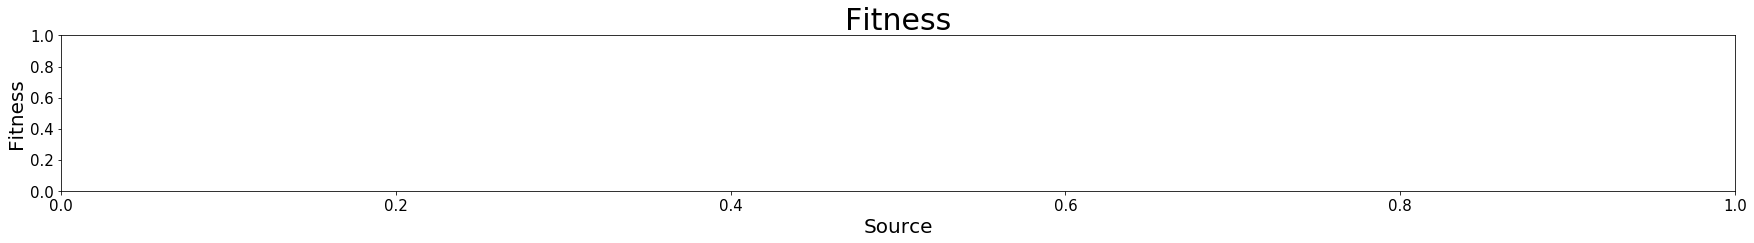

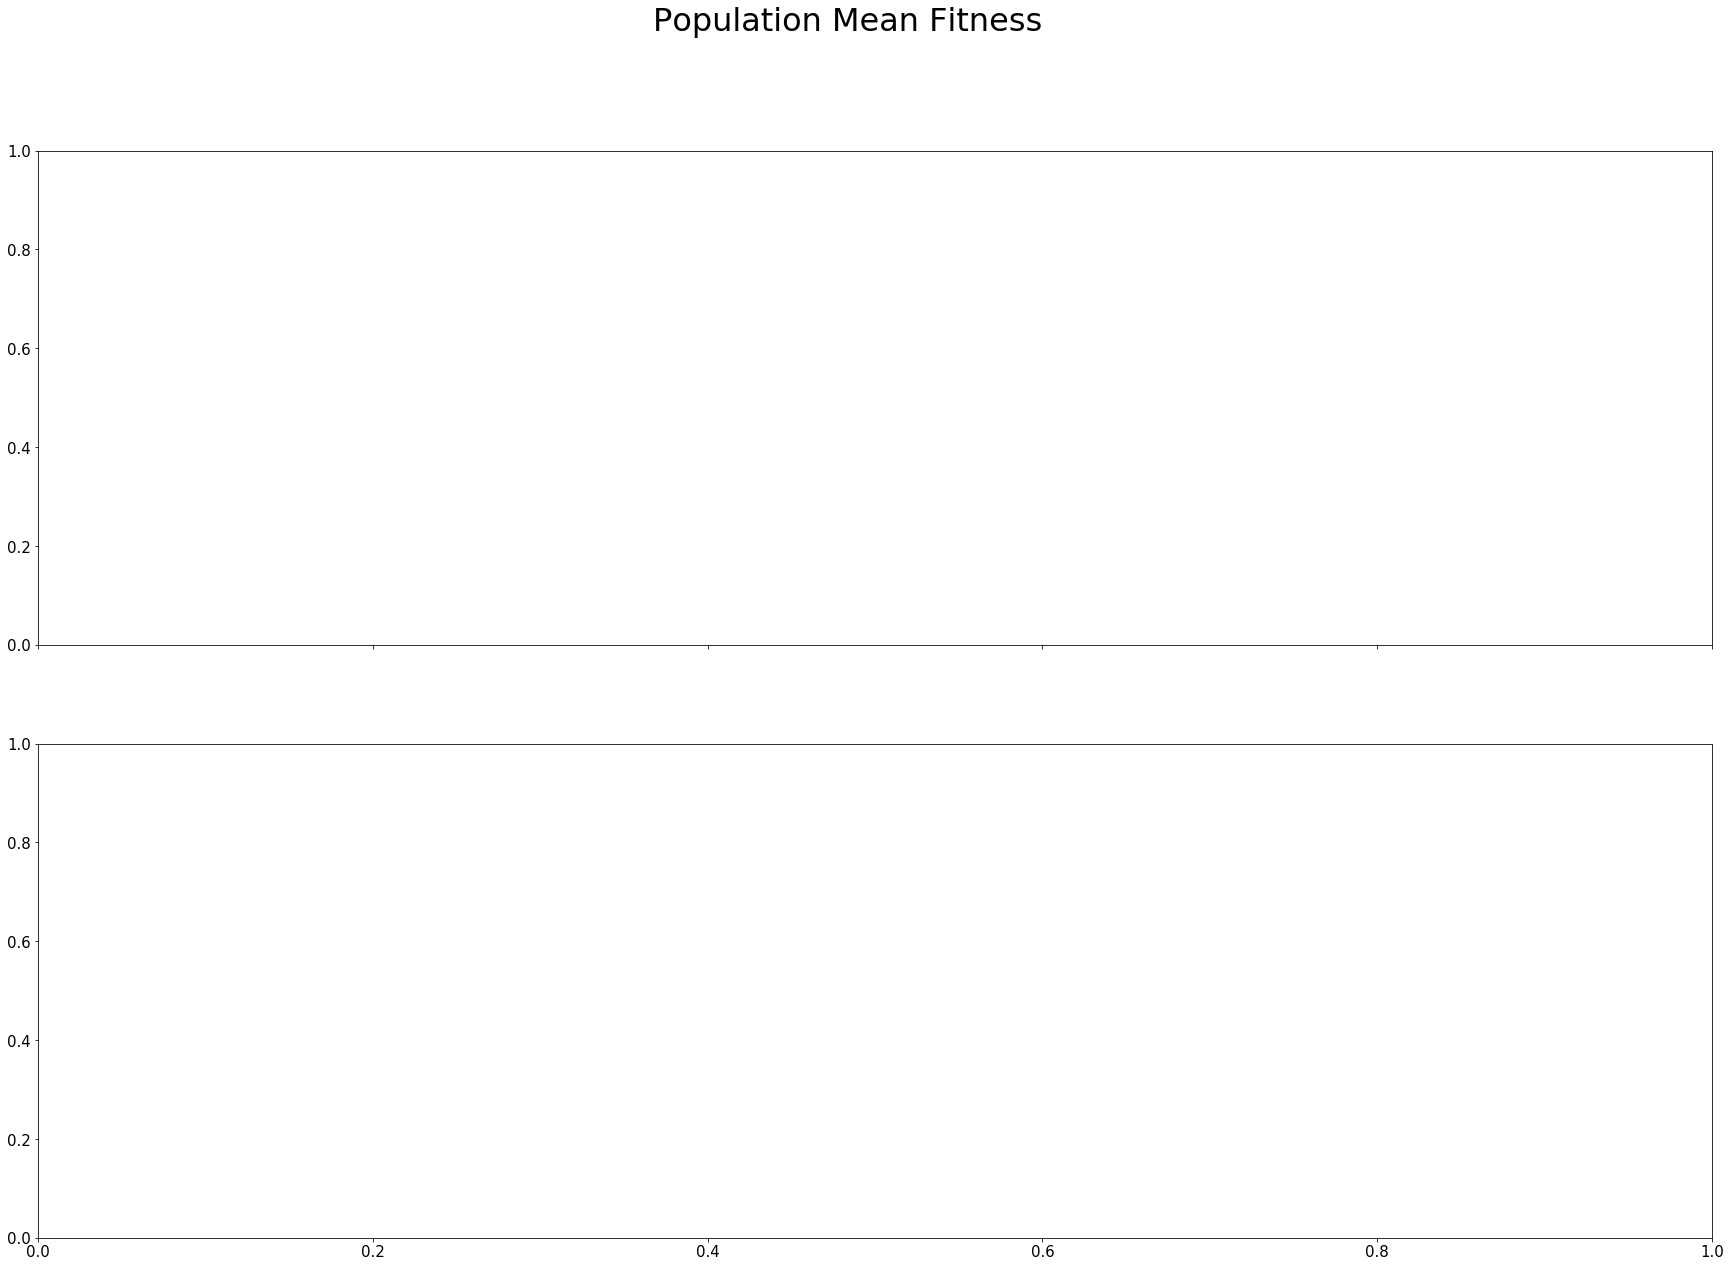

In [29]:
# Set up file writer for stat_fitness_global
f = open(OUTPUT_ROOT_DIR+"fitness_global/STATS-fitness_global.txt","w")

# Get all of the generation numbers as a column
df_means = pd.DataFrame(df_seed01_control_fitness_global['generation'].copy())
df_perc_change = pd.DataFrame(df_seed01_control_fitness_global['generation'].copy())

seed_keys = ['seed01', 'seed02', 'seed03', 'seed04', 'seed05']
print("stat_fitness_global")
f.write("stat_fitness_global")

invalid_headers = ['generation', 'secretion_error', 'parents_secretion_error', 'secretion_fitness', 'amt_compound_present']

num_headers = len(df_seed01_mutation_up_fitness_global.columns)-len(invalid_headers)
progress_counter = 1

# For every column header in all of the fitness_global files
for col_header in df_seed01_mutation_up_fitness_global.columns:
    if col_header in invalid_headers:
        continue
        
    else:
        print("\t"+ str(progress_counter) + "/" + str(num_headers) + " - " + col_header)
        # Concatenate all five seeds for each condition to make calculating the mean easier 
        df_control_tmp = pd.concat([df_seed01_control_fitness_global[col_header], df_seed02_control_fitness_global[col_header], df_seed03_control_fitness_global[col_header], df_seed04_control_fitness_global[col_header], df_seed05_control_fitness_global[col_header]], axis=1, keys=seed_keys)
        df_mut_up_tmp = pd.concat([df_seed01_mutation_up_fitness_global[col_header], df_seed02_mutation_up_fitness_global[col_header], df_seed03_mutation_up_fitness_global[col_header], df_seed04_mutation_up_fitness_global[col_header], df_seed05_mutation_up_fitness_global[col_header]], axis=1, keys=seed_keys)
        df_mut_down_tmp = pd.concat([df_seed01_mutation_down_fitness_global[col_header], df_seed02_mutation_down_fitness_global[col_header], df_seed03_mutation_down_fitness_global[col_header], df_seed04_mutation_down_fitness_global[col_header], df_seed05_mutation_down_fitness_global[col_header]], axis=1, keys=seed_keys)
        #df_pop_up_tmp = pd.concat([df_seed01_pop_up_fitness_global[col_header], df_seed02_pop_up_fitness_global[col_header], df_seed03_pop_up_fitness_global[col_header], df_seed04_pop_up_fitness_global[col_header], df_seed05_pop_up_fitness_global[col_header]], axis=1, keys=seed_keys)        
        df_pop_down_tmp = pd.concat([df_seed01_pop_down_fitness_global[col_header], df_seed02_pop_down_fitness_global[col_header], df_seed03_pop_down_fitness_global[col_header], df_seed04_pop_down_fitness_global[col_header], df_seed05_pop_down_fitness_global[col_header]], axis=1, keys=seed_keys)
        df_selection_up_tmp = pd.concat([df_seed01_selection_up_fitness_global[col_header], df_seed02_selection_up_fitness_global[col_header], df_seed03_selection_up_fitness_global[col_header], df_seed04_selection_up_fitness_global[col_header], df_seed05_selection_up_fitness_global[col_header]], axis=1, keys=seed_keys)
        df_selection_down_tmp = pd.concat([df_seed01_selection_down_fitness_global[col_header], df_seed02_selection_down_fitness_global[col_header], df_seed03_selection_down_fitness_global[col_header], df_seed04_selection_down_fitness_global[col_header], df_seed05_selection_down_fitness_global[col_header]], axis=1, keys=seed_keys)
        
        # Calculate the mean across the seeds for each condition and also smooth the results with a rolling window        df_means['control'] = df_control_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()
        df_means['control'] = df_control_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()
        df_means['mut_up'] = df_mut_up_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()
        df_means['mut_down'] = df_mut_down_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()
        #df_means['pop_up'] = df_pop_up_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()
        df_means['pop_down'] = df_pop_down_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()
        df_means['selection_up'] = df_selection_up_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()
        df_means['selection_down'] = df_selection_down_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()
        
        # For the fitness data, create a histogram in addition to the normal graphs
        if col_header == 'fitness':
            print("\t\tGenerating fitness histogram...")
            fig_fitness_box = plt.figure(figsize=(30,20))
            ax_fitness_boxplot = fig_fitness_box.add_subplot(611)
            ax_fitness_boxplot.set_title("Fitness", fontsize=30)
            ax_fitness_boxplot.set_xlabel("Source", fontsize=20)
            ax_fitness_boxplot.set_ylabel("Fitness", fontsize=20)
            
            # Create the figure and axes
            fig2, ax2 = plt.subplots(nrows=2,ncols=1,figsize=(30,20), sharex=True)
            fig2.suptitle("Population Mean Fitness", fontsize=32)

            # Set title and axis labels
            
            # Control
            #ax2[0].set_title("Control", fontsize=25)
            #ax2[0].set_xlabel("Generation", fontsize=20)
            #ax2[0].set_ylabel("Count", fontsize=20)
            
            # Mutation up
            #ax2[1].set_title("Mutation Up", fontsize=25)
            #ax2[1].set_xlabel("Generation", fontsize=20)
            #ax2[1].set_ylabel("Count", fontsize=20)
            
            #ax2[2].set_title("Mutation Down", fontsize=25)
            #ax2[2].set_xlabel("Generation", fontsize=20)
            #ax2[2].set_ylabel("Count", fontsize=20)
            
            #ax2[3].set_title("Selection Up", fontsize=25)
            #ax2[3].set_xlabel("Generation", fontsize=20)
            #ax2[3].set_ylabel("Count", fontsize=20)
            
            #ax2[4].set_title("Selection Down", fontsize=25)
            #ax2[4].set_xlabel("Generation", fontsize=20)
            #ax2[4].set_ylabel("Count", fontsize=20)
            
            #ax2[5].set_title("Population Up", fontsize=25)
            #ax2[5].set_xlabel("Generation", fontsize=20)
            #ax2[5].set_ylabel("Count", fontsize=20)
            
            #ax2[6].set_title("Population Down", fontsize=25)
            #ax2[6].set_xlabel("Generation", fontsize=20)
            #ax2[6].set_ylabel("Fitness", fontsize=20)
            
            #df_means.hist(column=['control', 'mut_up', 'mut_down', 'pop_down'], alpha=0.5, xlabelsize=20, ylabelsize=20, bins=50, ax=ax2[0])
            #df_means.hist(column=['selection_up', 'selection_down'],alpha=0.5, xlabelsize=20, ylabelsize=20, bins=50, ax=ax2[1])
            
            
            df_means.hist(df_means['control'], alpha=0.5, label='control', bins=50, ax=ax2[0])
            df_means.hist(df_means['mut_up'], alpha=0.5, label='mutation up', bins=50, ax=ax2[0])
            
            df_means.hist(df_means['selection_up'], alpha=0.5, label='selection up', bins=50, ax=ax2[1])
            
            fig2.savefig(OUTPUT_ROOT_DIR + "fitness_global/population_mean_fitness_histogram.png")
            fig2.clear()
            plt.close(fig2)
            break
            
                        
            #df_means.boxplot(column=['control', 'mut_up', 'mut_down', 'pop_down', 'selection_up'], vert=False, fontsize=20, ax=ax_fitness_boxplot)
            df_means.hist(column=['control', 'mut_up', 'mut_down', 'pop_down', 'selection_up', 'selection_down'], xlabelsize=20, ylabelsize=20, sharey=True, bins=50, ax=ax_fitness_boxplot)
            fig_fitness_box.savefig(OUTPUT_ROOT_DIR + "fitness_global/global_fitness_histogram.png")
            fig_fitness_box.clear()
            plt.close(fig_fitness_box)
            
            fig_fitness_plot = plt.figure(figsize=(30,20))
            ax_fitness_plot = fig_fitness_plot.add_subplot(111)
            ax_fitness_plot.set_title("Population Mean Fitness", fontsize=50)
            ax_fitness_plot.set_xlabel("Generation", fontsize=30)
            ax_fitness_plot.set_ylabel("Fitness", fontsize=30)
            ax_fitness_plot.tick_params(axis='x', labelsize=30)
            ax_fitness_plot.tick_params(axis='y', labelsize=30)
                        
            df_means.plot(x='generation', y='control', label='control', ax=ax_fitness_plot)
            df_means.plot(x='generation', y='mut_up', label='mutation up', ax=ax_fitness_plot)
            df_means.plot(x='generation', y='mut_down', label='mutation down', ax=ax_fitness_plot)
            df_means.plot(x='generation', y='pop_down', label='population down', ax=ax_fitness_plot)
            
            fig_fitness_plot.savefig(OUTPUT_ROOT_DIR + "fitness_global/population_mean_fitness_chart.png")
            fig_fitness_plot.clear()
            plt.close(fig_fitness_plot)
            print("\t\tDone!\n")
            print("\tcontinuing...") 
                        
           
        # Also calculate the percent change and add it to that DataFrame
        df_perc_change['control'] = perc_diff(df_means['control'], df_means['control'])
        df_perc_change['mut_up'] = perc_diff(df_means['mut_up'], df_means['control'])
        df_perc_change['mut_down'] = perc_diff(df_means['mut_down'], df_means['control'])
        #df_perc_change['pop_up'] = perc_diff(df_means['pop_up'], df_means['control'])
        df_perc_change['pop_down'] = perc_diff(df_means['pop_down'], df_means['control'])
        df_perc_change['selection_up'] = perc_diff(df_means['selection_up'], df_means['control'])
        df_perc_change['selection_down'] = perc_diff(df_means['selection_down'], df_means['control'])
        
        
        # Plot all conditions to the figure
        fig = plt.figure(figsize=(30,20))
        ax = fig.add_subplot(111)
        ax.set_title(name(col_header), fontsize=32)
        ax.set_xlabel("Generation", fontsize=20)
        ax.set_ylabel(name(col_header), fontsize=20)
        df_means.plot(x='generation', y='control', label='control', ax=ax)
        df_means.plot(x='generation', y='mut_up', label='mut_up', ax=ax)
        df_means.plot(x='generation', y='mut_down', label='mut_down', ax=ax)
        #df_means.plot(x='generation', y='pop_up', label='pop_up', ax=ax)
        df_means.plot(x='generation', y='pop_down', label='pop_down', ax=ax)
        df_means.plot(x='generation', y='selection_up', label='selection_up', ax=ax)
        df_means.plot(x='generation', y='selection_down', label='selection_down', ax=ax)
        
        fig.savefig(OUTPUT_ROOT_DIR+"fitness_global/stat_fitness_global_mean_"+col_header+".png")
        fig.clear()
        plt.close(fig)
        
        # Also create a new figure for the percent change
        fig = plt.figure(figsize=(30,20))
        ax = fig.add_subplot(111)
        ax.set_title("Percent Change vs. Control - " + name(col_header), fontsize=32)
        ax.set_xlabel("Generation", fontsize=20)
        ax.set_ylabel(name(col_header) + "percent change", fontsize=20)
        
        # Plot all conditions
        df_perc_change.plot(x='generation', y='control', label='control', linestyle='dashed', linewidth=3.3, ax=ax)
        df_perc_change.plot(x='generation', y='mut_up', label='mut_up', ax=ax)
        df_perc_change.plot(x='generation', y='mut_down', label='mut_down', ax=ax)
        #df_perc_change.plot(x='generation', y='pop_up', label='pop_up', ax=ax)
        df_perc_change.plot(x='generation', y='pop_down', label='pop_down', ax=ax)
        df_perc_change.plot(x='generation', y='selection_up', label='selection_up', ax=ax)
        df_perc_change.plot(x='generation', y='selection_down', label='selection_down', ax=ax)
        
        # Save the figure
        fig.savefig(OUTPUT_ROOT_DIR +"fitness_global/perc_change/stat_fitness_perc_change_"+col_header+".png")
        fig.clear()
        plt.close(fig)
        
         # PLOT THE DATA AND PERC CHANGE TO ONE FIGURE (2 SUBPLOTS)
        
        # Create the figure and axes
        fig2, ax2 = plt.subplots(2,figsize=(30,20), sharex=True)
        fig2.suptitle(name(col_header) + " - Values & Percent Change From Control", fontsize=32)
        
        # Set title and axis labels
        ax2[0].set_title(name(col_header), fontsize=25)
        ax2[0].set_xlabel("Generation", fontsize=20)
        ax2[0].set_ylabel(name(col_header), fontsize=20)
        ax2[1].set_title("Percent Change From Control", fontsize=25)
        ax2[1].set_xlabel("Generation", fontsize=20)
        ax2[1].set_ylabel("percent change from control", fontsize=20)
        
        # Plot the data to their respective subplots
        df_means.plot(x='generation', y='control', label='control', ax=ax2[0])
        df_means.plot(x='generation', y='mut_up', label='mutation up', ax=ax2[0])
        df_means.plot(x='generation', y='mut_down', label='mutation down', ax=ax2[0])
        df_means.plot(x='generation', y='selection_up', label='selection up', ax=ax2[0])
        df_means.plot(x='generation', y='selection_down', label='selection down', ax=ax2[0])
        #df_means.plot(x='generation', y='pop_up', label='population up',ax=ax2[0])
        df_means.plot(x='generation', y='pop_down', label='population down',ax=ax2[0])
        df_perc_change.plot(x='generation', y='control', label='control', linestyle='dashed', ax=ax2[1])
        df_perc_change.plot(x='generation', y='mut_up', label='mutation up', ax=ax2[1])
        df_perc_change.plot(x='generation', y='mut_down', label='mutation down', ax=ax2[1])
        df_perc_change.plot(x='generation', y='selection_up', label='selection up', ax=ax2[1])
        df_perc_change.plot(x='generation', y='selection_down', label='selection_down', ax=ax2[1])
        #df_perc_change.plot(x='generation', y='pop_up', label='population up', ax=ax2[1])
        df_perc_change.plot(x='generation', y='pop_down', label='population down', ax=ax2[1])
          
        # Save the figure then clear it from memory
        fig2.savefig(OUTPUT_ROOT_DIR + "fitness_global/num_and_perc_change/stat_fitness_global_"+col_header+".png")
        fig2.clear()
        plt.close(fig2)
        
        # STATISTICS
        
        # Calculate the Mann-Whitney test for all conditions vs. the control condition. 
        rank_sum_control, p_control = stats.mannwhitneyu(df_means['control'], df_means['control'])
        rank_sum_mut_up, p_mut_up = stats.mannwhitneyu(df_means['control'], df_means['mut_up'])
        rank_sum_mut_down, p_mut_down = stats.mannwhitneyu(df_means['control'], df_means['mut_down'])
        rank_sum_selection_up, p_selection_up = stats.mannwhitneyu(df_means['control'], df_means['selection_up'])
        rank_sum_selection_down, p_selection_down = stats.mannwhitneyu(df_means['control'], df_means['selection_down'])
        #rank_sum_population_up, p_population_up = stats.mannwhitneyu(df_means['control'], df_means['pop_up'])
        rank_sum_population_down, p_population_down = stats.mannwhitneyu(df_means['control'], df_means['pop_down'])


        # Print out the results of the Mann-Whitney tests
        f.write("\n"+LINE)
        f.write("\n\t\t\t\t"+col_header + "\n" + LINE)
        f.write("\n\t\t\trank sum | \tp-value\n")
        f.write(LINE)
        f.write(rank_sum_format('control', rank_sum_control, p_control))
        f.write(rank_sum_format('$\\mu_+$', rank_sum_mut_up, p_mut_up))
        f.write(rank_sum_format('$\\mu_-$', rank_sum_mut_down, p_mut_down))
        #f.write(rank_sum_format('$N_+$', rank_sum_population_up, p_pop_up))
        f.write(rank_sum_format('$N_-$', rank_sum_population_down, p_population_down))
        f.write(rank_sum_format('$k_+$', rank_sum_selection_up, p_selection_up))
        f.write(rank_sum_format('$k_-$', rank_sum_selection_down, p_selection_down))
        f.write("\n"+LINE+"\n")
       
        # Calculate the mean and standard deviation and output them to the stats file
        f.write("\t\t\tmean | \tstandard deviation | \tmean perc change\n" + LINE + "\n")
        f.write(mean_format('control', df_means['control'].mean(), df_means['control'].std(), '\\textemdash'))
        f.write(mean_format('$\\mu_+$', df_means['mut_up'].mean(), df_means['mut_up'].std(), perc_diff(df_means['mut_up'].mean(), df_means['control'].mean())))
        f.write(mean_format('$\\mu_-$', df_means['mut_down'].mean(), df_means['mut_down'].std(), perc_diff(df_means['mut_down'].mean(), df_means['control'].mean())))
        f.write(mean_format('$k_+$', df_means['selection_up'].mean(), df_means['selection_up'].std(), perc_diff(df_means['selection_up'].mean(), df_means['control'].mean())))
        f.write(mean_format('$k_-$', df_means['selection_down'].mean(), df_means['selection_down'].std(), perc_diff(df_means['selection_down'].mean(), df_means['control'].mean())))
        #f.write(mean_format('$N_+$', df_means['pop_up'].mean(), df_means['pop_up'].std(), perc_diff(df_means['pop_up'].mean(), df_means['control'].mean())))
        f.write(mean_format('$N_-$', df_means['pop_down'].mean(),  df_means['pop_down'].std(), perc_diff(df_means['pop_down'].mean(), df_means['control'].mean())))
        f.write("\n\n")
        
        progress_counter = progress_counter +1

plt.close('all')
f.close()
print("Graphing of stat_fitness_global complete!")



<a id='stat_bp_best_read'></a>

## Calculate percentage of non-coding DNA

### Read in the data
We need to read in stat_bp_best data, since this is where the number of non-coding DNA is

In [4]:
print("Reading in the data for stat_bp_best...")

# STAT_BP_BEST
bp_best_names = ['generation', 'num_bp_not_in_any_CDS', 'num_bp_not_in_any_functional_CDS', 'num_bp_not_in_any_non-functional_CDS', 'num_bp_not_included_in_any_RNA', 'num_bp_not_included_in_any_coding_RNA', 'num_bp_not_included_in_any_non-coding_RNA', 'num_of_non-essential_bp', 'num_of_non-essential_bp_including_non-functional_genes']
# Control
df_seed01_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed01//control//stats//stat_bp_best.out")
df_seed02_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed02//control//stats//stat_bp_best.out")
df_seed03_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed03//control//stats//stat_bp_best.out")
df_seed04_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed04//control//stats//stat_bp_best.out")
df_seed05_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed05//control//stats//stat_bp_best.out")

# Mutation Up
df_seed01_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_bp_best.out")
df_seed02_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_bp_best.out")
df_seed03_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_bp_best.out")
df_seed04_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_bp_best.out")
df_seed05_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_bp_best.out")

# Mutation Down
df_seed01_mutation_down_bp_best = read_bp(INPUT_ROOT_DIR + "seed01//mut_down//stats//stat_bp_best.out")
df_seed02_mutation_down_bp_best = read_bp(INPUT_ROOT_DIR + "seed02//mut_down//stats//stat_bp_best.out")
df_seed03_mutation_down_bp_best = read_bp(INPUT_ROOT_DIR + "seed03//mut_down//stats//stat_bp_best.out")
df_seed04_mutation_down_bp_best = read_bp(INPUT_ROOT_DIR + "seed04//mut_down//stats//stat_bp_best.out")
df_seed05_mutation_down_bp_best = read_bp(INPUT_ROOT_DIR + "seed05//mut_down//stats//stat_bp_best.out")

# Selection Up
df_seed01_selection_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed01//selection_up//stats//stat_bp_best.out")
df_seed02_selection_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed02//selection_up//stats//stat_bp_best.out")
df_seed03_selection_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed03//selection_up//stats//stat_bp_best.out")
df_seed04_selection_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed04//selection_up//stats//stat_bp_best.out")
df_seed05_selection_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed05//selection_up//stats//stat_bp_best.out")

# Selection Down
df_seed01_selection_down_bp_best = read_bp(INPUT_ROOT_DIR + "seed01//selection_down//stats//stat_bp_best.out")
df_seed02_selection_down_bp_best = read_bp(INPUT_ROOT_DIR + "seed02//selection_down//stats//stat_bp_best.out")
df_seed03_selection_down_bp_best = read_bp(INPUT_ROOT_DIR + "seed03//selection_down//stats//stat_bp_best.out")
df_seed04_selection_down_bp_best = read_bp(INPUT_ROOT_DIR + "seed04//selection_down//stats//stat_bp_best.out")
df_seed05_selection_down_bp_best = read_bp(INPUT_ROOT_DIR + "seed05//selection_down//stats//stat_bp_best.out")

# Population Up
#df_seed01_pop_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed01//pop_up//stats//stat_bp_best.out")
#df_seed02_pop_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed02//pop_up//stats//stat_bp_best.out")
#df_seed03_pop_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed03//pop_up//stats//stat_bp_best.out")
#df_seed04_pop_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed04//pop_up//stats//stat_bp_best.out")
#df_seed05_pop_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed05//pop_up//stats//stat_bp_best.out")

# Population Down
df_seed01_pop_down_bp_best = read_bp(INPUT_ROOT_DIR + "seed01//pop_down//stats//stat_bp_best.out")
df_seed02_pop_down_bp_best = read_bp(INPUT_ROOT_DIR + "seed02//pop_down//stats//stat_bp_best.out")
df_seed03_pop_down_bp_best = read_bp(INPUT_ROOT_DIR + "seed03//pop_down//stats//stat_bp_best.out")
df_seed04_pop_down_bp_best = read_bp(INPUT_ROOT_DIR + "seed04//pop_down//stats//stat_bp_best.out")
df_seed05_pop_down_bp_best = read_bp(INPUT_ROOT_DIR + "seed05//pop_down//stats//stat_bp_best.out")

print("done.")

print("Reading in stat_fitness_best data...")
# STAT_FITNESS_BEST
fitness_best_names = ['generation', 'pop_size', 'fitness', 'genome_size', 'metabolic_error','parents_metabolic_error', 'metabolic_fitness', 'secretion_error', 'parents_secretion_error', 'secretion_fitness', 'amt_compound_present']
# Control
df_seed01_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed01//control//stats//stat_fitness_best.out")
df_seed02_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed02//control//stats//stat_fitness_best.out")
df_seed03_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed03//control//stats//stat_fitness_best.out")
df_seed04_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed04//control//stats//stat_fitness_best.out")
df_seed05_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed05//control//stats//stat_fitness_best.out")

# Mutation Up
df_seed01_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_fitness_best.out")
df_seed02_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_fitness_best.out")
df_seed03_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_fitness_best.out")
df_seed04_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_fitness_best.out")
df_seed05_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_fitness_best.out")

# Mutation Down
df_seed01_mutation_down_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed01//mut_down//stats//stat_fitness_best.out")
df_seed02_mutation_down_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed02//mut_down//stats//stat_fitness_best.out")
df_seed03_mutation_down_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed03//mut_down//stats//stat_fitness_best.out")
df_seed04_mutation_down_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed04//mut_down//stats//stat_fitness_best.out")
df_seed05_mutation_down_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed05//mut_down//stats//stat_fitness_best.out")

# Selection Up
df_seed01_selection_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed01//selection_up//stats//stat_fitness_best.out")
df_seed02_selection_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed02//selection_up//stats//stat_fitness_best.out")
df_seed03_selection_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed03//selection_up//stats//stat_fitness_best.out")
df_seed04_selection_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed04//selection_up//stats//stat_fitness_best.out")
df_seed05_selection_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed05//selection_up//stats//stat_fitness_best.out")

# Selection Down
df_seed01_selection_down_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed01//selection_down//stats//stat_fitness_best.out")
df_seed02_selection_down_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed02//selection_down//stats//stat_fitness_best.out")
df_seed03_selection_down_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed03//selection_down//stats//stat_fitness_best.out")
df_seed04_selection_down_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed04//selection_down//stats//stat_fitness_best.out")
df_seed05_selection_down_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed05//selection_down//stats//stat_fitness_best.out")

# Population Up
#df_seed01_pop_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed01//pop_up//stats//stat_fitness_best.out")
#df_seed02_pop_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed02//pop_up//stats//stat_fitness_best.out")
#df_seed03_pop_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed03//pop_up//stats//stat_fitness_best.out")
#df_seed04_pop_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed04//pop_up//stats//stat_fitness_best.out")
#df_seed05_pop_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed05//pop_up//stats//stat_fitness_best.out")

# Population Down
df_seed01_pop_down_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed01//pop_down//stats//stat_fitness_best.out")
df_seed02_pop_down_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed02//pop_down//stats//stat_fitness_best.out")
df_seed03_pop_down_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed03//pop_down//stats//stat_fitness_best.out")
df_seed04_pop_down_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed04//pop_down//stats//stat_fitness_best.out")
df_seed05_pop_down_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed05//pop_down//stats//stat_fitness_best.out")

print("done.")

Reading in the data for stat_bp_best...
done.
Reading in stat_fitness_best data...
done.


<a id='percent_noncoding'></a>

### Calculate and graph out percent coding vs. non-coding

In [5]:
# Need to calculate percent of the genome which is non-coding for all seeds.
# This is: (avg number of non-coding bps) / (average total number of bps)
seed_keys = ['seed01', 'seed02', 'seed03', 'seed04', 'seed05']
print("Calculating and graphing percent non-coding...")

f = open(OUTPUT_ROOT_DIR+"/genes_best/STATS-noncoding.txt","w")

# Create new DataFrames to hold genome size for all seeds
df_control_gs_concat = pd.concat([df_seed01_control_fitness_best['genome_size'], df_seed02_control_fitness_best['genome_size'], df_seed03_control_fitness_best['genome_size'], df_seed04_control_fitness_best['genome_size'], df_seed05_control_fitness_best['genome_size']], axis=1, keys=seed_keys)
df_mut_up_gs_concat = pd.concat([df_seed01_mutation_up_fitness_best['genome_size'], df_seed02_mutation_up_fitness_best['genome_size'], df_seed03_mutation_up_fitness_best['genome_size'], df_seed04_mutation_up_fitness_best['genome_size'], df_seed05_mutation_up_fitness_best['genome_size']], axis=1, keys=seed_keys)
df_mut_down_gs_concat = pd.concat([df_seed01_mutation_down_fitness_best['genome_size'], df_seed02_mutation_down_fitness_best['genome_size'], df_seed03_mutation_down_fitness_best['genome_size'], df_seed04_mutation_down_fitness_best['genome_size'], df_seed05_mutation_down_fitness_best['genome_size']], axis=1, keys=seed_keys)
#df_pop_up_gs_concat = pd.concat([df_seed01_pop_up_fitness_best['genome_size'], df_seed02_pop_up_fitness_best['genome_size'], df_seed03_pop_up_fitness_best['genome_size'], df_seed04_pop_up_fitness_best['genome_size'], df_seed05_pop_up_fitness_best['genome_size']], axis=1, keys=seed_keys)        
df_pop_down_gs_concat = pd.concat([df_seed01_pop_down_fitness_best['genome_size'], df_seed02_pop_down_fitness_best['genome_size'], df_seed03_pop_down_fitness_best['genome_size'], df_seed04_pop_down_fitness_best['genome_size'], df_seed05_pop_down_fitness_best['genome_size']], axis=1, keys=seed_keys)
df_selection_up_gs_concat = pd.concat([df_seed01_selection_up_fitness_best['genome_size'], df_seed02_selection_up_fitness_best['genome_size'], df_seed03_selection_up_fitness_best['genome_size'], df_seed04_selection_up_fitness_best['genome_size'], df_seed05_selection_up_fitness_best['genome_size']], axis=1, keys=seed_keys)
df_selection_down_gs_concat = pd.concat([df_seed01_selection_down_fitness_best['genome_size'], df_seed02_selection_down_fitness_best['genome_size'], df_seed03_selection_down_fitness_best['genome_size'], df_seed04_selection_down_fitness_best['genome_size'], df_seed05_selection_down_fitness_best['genome_size']], axis=1, keys=seed_keys)


# Copy generation numbers to new DF
df_control_tmp = pd.DataFrame(df_seed01_control_fitness_best['generation'].copy())
df_mut_up_tmp = pd.DataFrame(df_seed01_mutation_up_fitness_best['generation'].copy())
df_mut_down_tmp = pd.DataFrame(df_seed01_mutation_down_fitness_best['generation'].copy())
#df_pop_up_tmp = pd.DataFrame(df_seed01_pop_up_fitness_best['generation'].copy())
df_pop_down_tmp = pd.DataFrame(df_seed01_pop_down_fitness_best['generation'].copy())
df_selection_up_tmp = pd.DataFrame(df_seed01_selection_up_fitness_best['generation'].copy())
df_selection_down_tmp = pd.DataFrame(df_seed01_selection_down_fitness_best['generation'].copy())

# Calculate the means across the seeds
df_control_tmp['mean_genome_size'] = df_control_gs_concat.mean(axis=1).rolling(WINDOW_SIZE).mean()
df_mut_up_tmp['mean_genome_size'] = df_mut_up_gs_concat.mean(axis=1).rolling(WINDOW_SIZE).mean()
df_mut_down_tmp['mean_genome_size'] = df_mut_down_gs_concat.mean(axis=1).rolling(WINDOW_SIZE).mean()
#df_pop_up_tmp['mean_genome_size'] = df_pop_up_gs_concat.mean(axis=1).rolling(WINDOW_SIZE).mean()
df_pop_down_tmp['mean_genome_size'] = df_pop_down_gs_concat.mean(axis=1).rolling(WINDOW_SIZE).mean()
df_selection_up_tmp['mean_genome_size'] = df_selection_up_gs_concat.mean(axis=1).rolling(WINDOW_SIZE).mean()
df_selection_down_tmp['mean_genome_size'] = df_selection_down_gs_concat.mean(axis=1).rolling(WINDOW_SIZE).mean()

# NOW FIND THE MEAN NUMBER OF NONCODING BASES ACROSS ALL SEEDS

# Concatenate all five seeds for each condition to make calculating the mean easier 
df_control_nc_tmp = pd.concat([df_seed01_control_bp_best['num_bp_not_in_any_CDS'], df_seed02_control_bp_best['num_bp_not_in_any_CDS'], df_seed03_control_bp_best['num_bp_not_in_any_CDS'], df_seed04_control_bp_best['num_bp_not_in_any_CDS'], df_seed05_control_bp_best['num_bp_not_in_any_CDS']], axis=1, keys=seed_keys)
df_mut_up_nc_tmp = pd.concat([df_seed01_mutation_up_bp_best['num_bp_not_in_any_CDS'], df_seed02_mutation_up_bp_best['num_bp_not_in_any_CDS'], df_seed03_mutation_up_bp_best['num_bp_not_in_any_CDS'], df_seed04_mutation_up_bp_best['num_bp_not_in_any_CDS'], df_seed05_mutation_up_bp_best['num_bp_not_in_any_CDS']], axis=1, keys=seed_keys)
df_mut_down_nc_tmp = pd.concat([df_seed01_mutation_down_bp_best['num_bp_not_in_any_CDS'], df_seed02_mutation_down_bp_best['num_bp_not_in_any_CDS'], df_seed03_mutation_down_bp_best['num_bp_not_in_any_CDS'], df_seed04_mutation_down_bp_best['num_bp_not_in_any_CDS']], axis=1, keys=seed_keys) #df_seed05_mutation_down_bp_best['num_bp_not_in_any_CDS']], axis=1, keys=seed_keys)
#df_pop_up_nc_tmp = pd.concat([df_seed01_pop_up_bp_best['num_bp_not_in_any_CDS'], df_seed02_pop_up_bp_best['num_bp_not_in_any_CDS'], df_seed03_pop_up_bp_best['num_bp_not_in_any_CDS'], df_seed04_pop_up_bp_best['num_bp_not_in_any_CDS'], df_seed05_pop_up_bp_best['num_bp_not_in_any_CDS']], axis=1, keys=seed_keys)        
df_pop_down_nc_tmp = pd.concat([df_seed01_pop_down_bp_best['num_bp_not_in_any_CDS'], df_seed02_pop_down_bp_best['num_bp_not_in_any_CDS'], df_seed03_pop_down_bp_best['num_bp_not_in_any_CDS'], df_seed04_pop_down_bp_best['num_bp_not_in_any_CDS'], df_seed05_pop_down_bp_best['num_bp_not_in_any_CDS']], axis=1, keys=seed_keys)
df_selection_up_nc_tmp = pd.concat([df_seed01_selection_up_bp_best['num_bp_not_in_any_CDS'], df_seed02_selection_up_bp_best['num_bp_not_in_any_CDS'], df_seed03_selection_up_bp_best['num_bp_not_in_any_CDS'], df_seed04_selection_up_bp_best['num_bp_not_in_any_CDS']], axis=1, keys=seed_keys)#df_seed05_selection_up_bp_best['num_bp_not_in_any_CDS']], axis=1, keys=seed_keys)
df_selection_down_nc_tmp = pd.concat([df_seed01_selection_down_bp_best['num_bp_not_in_any_CDS'], df_seed02_selection_down_bp_best['num_bp_not_in_any_CDS'], df_seed03_selection_down_bp_best['num_bp_not_in_any_CDS'], df_seed04_selection_down_bp_best['num_bp_not_in_any_CDS']], axis=1, keys=seed_keys)  #df_seed05_selection_down_bp_best['num_bp_not_in_any_CDS']], axis=1, keys=seed_keys)


df_control_tmp['mean_nc_size'] = df_control_nc_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()
df_mut_up_tmp['mean_nc_size'] = df_mut_up_nc_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()
df_mut_down_tmp['mean_nc_size'] = df_mut_down_nc_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()
#df_pop_up_tmp['mean_nc_size'] = df_pop_up_nc_tmp['num_bp_not_in_any_CDS'].mean(axis=1).rolling(WINDOW_SIZE).mean()
df_pop_down_tmp['mean_nc_size'] = df_pop_down_nc_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()
df_selection_up_tmp['mean_nc_size'] = df_selection_up_nc_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()
df_selection_down_tmp['mean_nc_size'] = df_selection_down_nc_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()


df_perc_noncoding = pd.DataFrame(df_seed01_control_bp_best['generation'].copy())

df_perc_noncoding['control'] = 100* (df_control_tmp['mean_nc_size']  / df_control_tmp['mean_genome_size'])
df_perc_noncoding['mut_up'] = 100* (df_mut_up_tmp['mean_nc_size']  / df_mut_up_tmp['mean_genome_size'])
df_perc_noncoding['mut_down'] = 100* (df_mut_down_tmp['mean_nc_size']  / df_mut_down_tmp['mean_genome_size'])
df_perc_noncoding['selection_up'] = 100* (df_selection_up_tmp['mean_nc_size']  / df_selection_up_tmp['mean_genome_size'])
df_perc_noncoding['selection_down'] = 100* (df_selection_down_tmp['mean_nc_size']  / df_selection_down_tmp['mean_genome_size'])
#df_perc_noncoding['population_up'] = 100* (df_pop_up_tmp['mean_nc_size']  / df_pop_up_tmp['mean_genome_size'])
df_perc_noncoding['population_down'] = 100* (df_pop_down_tmp['mean_nc_size']  / df_pop_down_tmp['mean_genome_size'])

fig_perc_noncoding = plt.figure(figsize=(30,20))
ax_perc_nc = fig_perc_noncoding.add_subplot(111)
ax_perc_nc.set_title("Percent Non-Coding", fontsize=30)
ax_perc_nc.set_xlabel("Generation", fontsize=20)
ax_perc_nc.set_ylabel("Percent", fontsize=20)

df_perc_noncoding.plot(x='generation', y='control', label='control', ax=ax_perc_nc)
df_perc_noncoding.plot(x='generation', y='mut_up', label='mutation up', ax=ax_perc_nc)
df_perc_noncoding.plot(x='generation', y='mut_down', label='mutation down', ax=ax_perc_nc)
df_perc_noncoding.plot(x='generation', y='selection_up', label='selection up', ax=ax_perc_nc)
df_perc_noncoding.plot(x='generation', y='selection_down', label='selection down', ax=ax_perc_nc)
#df_perc_noncoding.plot(x='generation', y='population_up', label='population up', ax=ax_perc_nc)
df_perc_noncoding.plot(x='generation', y='population_down', label='population down', ax=ax_perc_nc)

fig_perc_noncoding.savefig(OUTPUT_ROOT_DIR + "bp_best/percent_noncoding.png")
fig_perc_noncoding.clear()
plt.close(fig_perc_noncoding)
print("done.")

print("Calculating and graph percent change...")
# Calculate the percent change from the control condition
df_perc_change = pd.DataFrame(df_seed01_control_bp_best['generation'].copy())
df_perc_change['control'] = perc_diff(df_perc_noncoding['control'], df_perc_noncoding['control'])
df_perc_change['mut_up'] = perc_diff(df_perc_noncoding['mut_up'], df_perc_noncoding['control'])
df_perc_change['mut_down'] = perc_diff(df_perc_noncoding['mut_down'], df_perc_noncoding['control'])
df_perc_change['selection_up'] = perc_diff(df_perc_noncoding['selection_up'], df_perc_noncoding['control'])
df_perc_change['selection_down'] = perc_diff(df_perc_noncoding['selection_down'], df_perc_noncoding['control'])
#df_perc_change['population_up'] = perc_diff(df_perc_noncoding['population_up'], df_perc_noncoding['control'])
df_perc_change['population_down'] = perc_diff(df_perc_noncoding['population_down'], df_perc_noncoding['control'])

# Create the figure and axes
fig2, ax2 = plt.subplots(2,figsize=(30,20), sharex=True)
fig2.suptitle("Percent Non-Coding", fontsize=32)

# Set title and axis labels
ax2[0].set_title("Percent", fontsize=25)
ax2[0].set_xlabel("Generation", fontsize=20)
#ax2[0].set_ylabel(name(col_header), fontsize=20)
ax2[1].set_title("Percent Change From Control", fontsize=25)
ax2[1].set_xlabel("Generation", fontsize=20)
ax2[1].set_ylabel("percent change from control", fontsize=20)

# Plot!
df_perc_noncoding.plot(x='generation', y='control', label='control', ax=ax2[0])
df_perc_noncoding.plot(x='generation', y='mut_up', label='mutation up', ax=ax2[0])
df_perc_noncoding.plot(x='generation', y='mut_down', label='mutation down', ax=ax2[0])
df_perc_noncoding.plot(x='generation', y='selection_up', label='selection up', ax=ax2[0])
df_perc_noncoding.plot(x='generation', y='selection_down', label='selection down', ax=ax2[0])
#df_perc_noncoding.plot(x='generation', y='population_up', label='population up', ax=ax2[0])
df_perc_noncoding.plot(x='generation', y='population_down', label='population down', ax=ax2[0])

df_perc_change.plot(x='generation', y='control', label='control', linestyle='dashed', ax=ax2[1])
df_perc_change.plot(x='generation', y='mut_up', label='mutation up', ax=ax2[1])
df_perc_change.plot(x='generation', y='mut_down', label='mutation down', ax=ax2[1])
df_perc_change.plot(x='generation', y='selection_up', label='selection up', ax=ax2[1])
df_perc_change.plot(x='generation', y='selection_down', label='selection_down', ax=ax2[1])
#df_perc_change.plot(x='generation', y='population_up', label='population up', ax=ax2[1])
df_perc_change.plot(x='generation', y='population_down', label='population down', ax=ax2[1])

# Save the figure then clear it from memory
fig2.savefig(OUTPUT_ROOT_DIR + "bp_best/num_and_perc_change/perc_change_noncoding.png")
fig2.clear()
plt.close(fig2)

print("done.")

# STATISTICS


# Calculate the Mann-Whitney test for all conditions vs. the control condition. 
rank_sum_control, p_control = stats.mannwhitneyu(df_perc_noncoding['control'], df_perc_noncoding['control'])
rank_sum_mut_up, p_mut_up = stats.mannwhitneyu(df_perc_noncoding['control'], df_perc_noncoding['mut_up'])
rank_sum_mut_down, p_mut_down = stats.mannwhitneyu(df_perc_noncoding['control'], df_perc_noncoding['mut_down'])
rank_sum_selection_up, p_selection_up = stats.mannwhitneyu(df_perc_noncoding['control'], df_perc_noncoding['selection_up'])
rank_sum_selection_down, p_selection_down = stats.mannwhitneyu(df_perc_noncoding['control'], df_perc_noncoding['selection_down'])
#rank_sum_population_up, p_population_up = stats.mannwhitneyu(df_perc_noncoding['control'], df_perc_noncoding['population_up'])
rank_sum_population_down, p_population_down = stats.mannwhitneyu(df_perc_noncoding['control'], df_perc_noncoding['population_down'])


# Print out the results of the Mann-Whitney tests
f.write(LINE)
f.write("\n\t\t\t\tNoncoding Statistics")
f.write("\n\t\t\trank sum\t\tp-value\n")
f.write(LINE)
f.write(rank_sum_format('control', rank_sum_control, p_control))
f.write(rank_sum_format('$\\mu_+$', rank_sum_mut_up, p_mut_up))
f.write(rank_sum_format('$\\mu_-$', rank_sum_mut_down, p_mut_down))
#f.write(rank_sum_format('$N_+$', rank_sum_population_up, p_pop_up))
f.write(rank_sum_format('$N_-$', rank_sum_population_down, p_population_down))
f.write(rank_sum_format('$k_+$', rank_sum_selection_up, p_selection_up))
f.write(rank_sum_format('$k_-$', rank_sum_selection_down, p_selection_down))
f.write("\n"+LINE+"\n")

# Print out the mean and standard deviation for each statistic
f.write("\t\t\tmean\t\t\tstandard deviation\t\t\tmean perc diff\n" + LINE + "\n")
f.write(mean_format('control', df_perc_noncoding['control'].mean(), df_perc_noncoding['control'].std(), '\\textemdash'))
f.write(mean_format('$\\mu_+$', df_perc_noncoding['mut_up'].mean(), df_perc_noncoding['mut_up'].std(), perc_diff(df_perc_noncoding['mut_up'].mean(), df_perc_noncoding['control'].mean())))
f.write(mean_format('$\\mu_-$', df_perc_noncoding['mut_down'].mean(), df_perc_noncoding['mut_down'].std(), perc_diff(df_perc_noncoding['mut_down'].mean(), df_perc_noncoding['control'].mean())))
f.write(mean_format('$k_+$', df_perc_noncoding['selection_up'].mean(), df_perc_noncoding['selection_up'].std(), perc_diff(df_perc_noncoding['selection_up'].mean(), df_perc_noncoding['control'].mean())))
f.write(mean_format('$k_-$', df_perc_noncoding['selection_down'].mean(), df_perc_noncoding['selection_down'].std(), perc_diff(df_perc_noncoding['selection_down'].mean(), df_perc_noncoding['control'].mean())))
#f.write(mean_format('$N_+$', df_perc_noncoding['population_up'].mean(), df_perc_noncoding['population_up'].std(), perc_diff(df_perc_noncoding['population_up'].mean(), df_perc_noncoding['control'].mean())))
f.write(mean_format('$N_-$', df_perc_noncoding['population_down'].mean(), df_perc_noncoding['population_down'].std(), perc_diff(df_perc_noncoding['population_down'].mean(), df_perc_noncoding['control'].mean())))
f.write("\n\n")


f.close()

print("Statistics complete.")

Calculating and graphing percent non-coding...
done.
Calculating and graph percent change...
done.
Statistics complete.


### Delete unneeded DataFrames (stat_bp_best)

In [6]:
print("Deleting unneeded DataFrames...")

del df_seed01_control_bp_best, df_seed02_control_bp_best, df_seed03_control_bp_best, df_seed04_control_bp_best, df_seed05_control_bp_best 
del df_seed01_mutation_up_bp_best, df_seed02_mutation_up_bp_best, df_seed03_mutation_up_bp_best, df_seed04_mutation_up_bp_best, df_seed05_mutation_up_bp_best
del df_seed01_mutation_down_bp_best, df_seed02_mutation_down_bp_best, df_seed03_mutation_down_bp_best, df_seed04_mutation_down_bp_best, df_seed05_mutation_down_bp_best 
del df_seed01_selection_up_bp_best, df_seed02_selection_up_bp_best, df_seed03_selection_up_bp_best, df_seed04_selection_up_bp_best, df_seed05_selection_up_bp_best
del df_seed01_selection_down_bp_best, df_seed02_selection_down_bp_best, df_seed03_selection_down_bp_best, df_seed04_selection_down_bp_best, df_seed05_selection_down_bp_best
#del df_seed01_pop_up_bp_best, df_seed02_pop_up_bp_best, df_seed03_pop_up_bp_best, df_seed04_pop_up_bp_best, df_seed05_pop_up_bp_best
del df_seed01_pop_down_bp_best, df_seed02_pop_down_bp_best, df_seed03_pop_down_bp_best, df_seed04_pop_down_bp_best, df_seed05_pop_down_bp_best

print("done.")

Deleting unneeded DataFrames...
done.


### Delete unneeded DataFrames (stat_fitness_glob)

In [7]:
# Delete the DataFrames that are no longer needed
print ("Deleting unneeded DataFrames")
del df_means, df_control_tmp, df_mut_up_tmp, df_mut_down_tmp, df_pop_down_tmp, df_selection_up_tmp, df_selection_down_tmp #<- Delete until mut_down!!! df_pop_up_mp, df_pop_down_tmp, df_selection_up_tmp, df_selection_down_tmp
del df_seed01_control_fitness_global, df_seed02_control_fitness_global, df_seed03_control_fitness_global, df_seed04_control_fitness_global, df_seed05_control_fitness_global
del df_seed01_mutation_up_fitness_global, df_seed02_mutation_up_fitness_global, df_seed03_mutation_up_fitness_global, df_seed04_mutation_up_fitness_global, df_seed05_mutation_up_fitness_global
del df_seed01_mutation_down_fitness_global, df_seed02_mutation_down_fitness_global, df_seed03_mutation_down_fitness_global, df_seed04_mutation_down_fitness_global, df_seed05_mutation_down_fitness_global
del df_seed01_selection_up_fitness_global, df_seed02_selection_up_fitness_global, df_seed03_selection_up_fitness_global, df_seed04_selection_up_fitness_global, df_seed05_selection_up_fitness_global
del df_seed01_selection_down_fitness_global, df_seed02_selection_down_fitness_global, df_seed03_selection_down_fitness_global, df_seed04_selection_down_fitness_global, df_seed05_selection_down_fitness_global
#del df_seed01_pop_up_fitness_global, df_seed02_pop_up_fitness_global, df_seed03_pop_up_fitness_global, df_seed04_pop_up_fitness_global, df_seed05_pop_up_fitness_global
del df_seed01_pop_down_fitness_global, df_seed02_pop_down_fitness_global, df_seed03_pop_down_fitness_global, df_seed04_pop_down_fitness_global, df_seed05_pop_down_fitness_global
print("Done")

Deleting unneeded DataFrames
Done


<a id='stat_genes_global_read'></a>

# stat_genes_global

## Read in the data

In [8]:
print("Reading in stat_genes_global")


# STAT_GENES_BEST
genes_global_names = ['generation', 'num_coding_RNAs', 'num_non-coding_RNAs', 'avg_size_of_coding_RNAs', 'avg_size_of_non-coding_RNAs', 'num_functional_genes', 'num_non-functional_genes', 'avg_size_of_functional_genes', 'avg_size_of_non-functional_genes']

# Control
df_seed01_control_genes_global = read_genes(INPUT_ROOT_DIR + "seed01//control//stats//stat_genes_glob.out")
df_seed02_control_genes_global = read_genes(INPUT_ROOT_DIR + "seed02//control//stats//stat_genes_glob.out")
df_seed03_control_genes_global = read_genes(INPUT_ROOT_DIR + "seed03//control//stats//stat_genes_glob.out")
df_seed04_control_genes_global = read_genes(INPUT_ROOT_DIR + "seed04//control//stats//stat_genes_glob.out")
df_seed05_control_genes_global = read_genes(INPUT_ROOT_DIR + "seed05//control//stats//stat_genes_glob.out")

# Mutation Up
df_seed01_mutation_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_genes_glob.out")
df_seed02_mutation_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_genes_glob.out")
df_seed03_mutation_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_genes_glob.out")
df_seed04_mutation_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_genes_glob.out")
df_seed05_mutation_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_genes_glob.out")

# Mutation Down
df_seed01_mutation_down_genes_global = read_genes(INPUT_ROOT_DIR + "seed01//mut_down//stats//stat_genes_glob.out")
df_seed02_mutation_down_genes_global = read_genes(INPUT_ROOT_DIR + "seed02//mut_down//stats//stat_genes_glob.out")
df_seed03_mutation_down_genes_global = read_genes(INPUT_ROOT_DIR + "seed03//mut_down//stats//stat_genes_glob.out")
df_seed04_mutation_down_genes_global = read_genes(INPUT_ROOT_DIR + "seed04//mut_down//stats//stat_genes_glob.out")
df_seed05_mutation_down_genes_global = read_genes(INPUT_ROOT_DIR + "seed05//mut_down//stats//stat_genes_glob.out")

# Selection Up
df_seed01_selection_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed01//selection_up//stats//stat_genes_glob.out")
df_seed02_selection_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed02//selection_up//stats//stat_genes_glob.out")
df_seed03_selection_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed03//selection_up//stats//stat_genes_glob.out")
df_seed04_selection_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed04//selection_up//stats//stat_genes_glob.out")
df_seed05_selection_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed05//selection_up//stats//stat_genes_glob.out")

# Selection Down
df_seed01_selection_down_genes_global = read_genes(INPUT_ROOT_DIR + "seed01//selection_down//stats//stat_genes_glob.out")
df_seed02_selection_down_genes_global = read_genes(INPUT_ROOT_DIR + "seed02//selection_down//stats//stat_genes_glob.out")
df_seed03_selection_down_genes_global = read_genes(INPUT_ROOT_DIR + "seed03//selection_down//stats//stat_genes_glob.out")
df_seed04_selection_down_genes_global = read_genes(INPUT_ROOT_DIR + "seed04//selection_down//stats//stat_genes_glob.out")
df_seed05_selection_down_genes_global = read_genes(INPUT_ROOT_DIR + "seed05//selection_down//stats//stat_genes_glob.out")

# Population Up
#df_seed01_pop_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed01//pop_up//stats//stat_genes_glob.out")
#df_seed02_pop_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed02//pop_up//stats//stat_genes_glob.out")
#df_seed03_pop_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed03//pop_up//stats//stat_genes_glob.out")
#df_seed04_pop_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed04//pop_up//stats//stat_genes_glob.out")
#df_seed05_pop_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed05//pop_up//stats//stat_genes_glob.out")

# Population Down
df_seed01_pop_down_genes_global = read_genes(INPUT_ROOT_DIR + "seed01//pop_down//stats//stat_genes_glob.out")
df_seed02_pop_down_genes_global = read_genes(INPUT_ROOT_DIR + "seed02//pop_down//stats//stat_genes_glob.out")
df_seed03_pop_down_genes_global = read_genes(INPUT_ROOT_DIR + "seed03//pop_down//stats//stat_genes_glob.out")
df_seed04_pop_down_genes_global = read_genes(INPUT_ROOT_DIR + "seed04//pop_down//stats//stat_genes_glob.out")
df_seed05_pop_down_genes_global = read_genes(INPUT_ROOT_DIR + "seed05//pop_down//stats//stat_genes_glob.out")

print("done.")

Reading in stat_genes_global
done.


<a id='stat_genes_global_graph'></a>

## Graph results of stat_genes_global

In [9]:
f = open(OUTPUT_ROOT_DIR+"genes_global/STATS-genes_global.txt","w")

# Get all of the generation numbers as a column
df_means = pd.DataFrame(df_seed01_control_genes_global['generation'].copy())
df_perc_change = pd.DataFrame(df_seed01_control_genes_global['generation'].copy())
seed_keys = ['seed01','seed02', 'seed03', 'seed04', 'seed05']

print("stat_genes_global")
f.write("stat_genes_global\n")

invalid_headers = ['generation']
num_headers = len(df_seed01_mutation_up_genes_global.columns) - len(invalid_headers)
progress_counter = 1

# For every column header in all of the genes_global files
for col_header in df_seed01_mutation_up_genes_global.columns:
    if col_header in invalid_headers:
        continue
    else:
        print("\t"+ str(progress_counter) + "/" + str(num_headers) + " - " + col_header)
        # Concatenate all five seeds for each condition to make calculating the mean easier 
        df_control_tmp = pd.concat([df_seed01_control_genes_global[col_header], df_seed02_control_genes_global[col_header], df_seed03_control_genes_global[col_header], df_seed04_control_genes_global[col_header], df_seed05_control_genes_global[col_header]], axis=1, keys=seed_keys)
        df_mut_up_tmp = pd.concat([df_seed01_mutation_up_genes_global[col_header], df_seed02_mutation_up_genes_global[col_header], df_seed03_mutation_up_genes_global[col_header], df_seed04_mutation_up_genes_global[col_header], df_seed05_mutation_up_genes_global[col_header]], axis=1, keys=seed_keys)
        df_mut_down_tmp = pd.concat([df_seed01_mutation_down_genes_global[col_header], df_seed02_mutation_down_genes_global[col_header], df_seed03_mutation_down_genes_global[col_header], df_seed04_mutation_down_genes_global[col_header], df_seed05_mutation_down_genes_global[col_header]], axis=1, keys=seed_keys)
        #df_pop_up_tmp = pd.concat([df_seed01_pop_up_genes_global[col_header], df_seed02_pop_up_genes_global[col_header], df_seed03_pop_up_genes_global[col_header], df_seed04_pop_up_genes_global[col_header], df_seed05_pop_up_genes_global[col_header]], axis=1, keys=seed_keys)        
        df_pop_down_tmp = pd.concat([df_seed01_pop_down_genes_global[col_header], df_seed02_pop_down_genes_global[col_header], df_seed03_pop_down_genes_global[col_header], df_seed04_pop_down_genes_global[col_header], df_seed05_pop_down_genes_global[col_header]], axis=1, keys=seed_keys)
        df_selection_up_tmp = pd.concat([df_seed01_selection_up_genes_global[col_header], df_seed02_selection_up_genes_global[col_header], df_seed03_selection_up_genes_global[col_header],df_seed04_selection_up_genes_global[col_header]], axis=1, keys=seed_keys) # df_seed05_selection_up_genes_global[col_header]], axis=1, keys=seed_keys)
        df_selection_down_tmp = pd.concat([df_seed01_selection_down_genes_global[col_header], df_seed02_selection_down_genes_global[col_header], df_seed03_selection_down_genes_global[col_header]], axis=1, keys=seed_keys)# df_seed04_selection_down_genes_global[col_header]], axis=1, keys=seed_keys)# df_seed05_selection_down_genes_global[col_header]], axis=1, keys=seed_keys)
        
        # Calculate the mean across the seeds for each condition and also smooth the results with a rolling window        df_means['control'] = df_control_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()
        df_means['control'] = df_control_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()
        df_means['mut_up'] = df_mut_up_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()
        df_means['mut_down'] = df_mut_down_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()
        #df_means['pop_up'] = df_pop_up_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()
        df_means['pop_down'] = df_pop_down_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()
        df_means['selection_up'] = df_selection_up_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()
        df_means['selection_down'] = df_selection_down_tmp.mean(axis=1).rolling(WINDOW_SIZE).mean()
               
        # Also calculate the percent change and add it to that DataFrame
        df_perc_change['control'] = perc_diff(df_means['control'], df_means['control'])
        df_perc_change['mut_up'] = perc_diff(df_means['mut_up'], df_means['control'])
        df_perc_change['mut_down'] = perc_diff(df_means['mut_down'], df_means['control'])
        #df_perc_change['pop_up'] = perc_diff(df_means['pop_up'], df_means['control'])
        df_perc_change['pop_down'] = perc_diff(df_means['pop_down'], df_means['control'])
        df_perc_change['selection_up'] = perc_diff(df_means['selection_up'], df_means['control'])
        df_perc_change['selection_down'] = perc_diff(df_means['selection_down'], df_means['control'])
        
        # Plot all conditions to the figure
        fig = plt.figure(figsize=(30,20))
        ax = fig.add_subplot(111)
        ax.set_title( name(col_header), fontsize=32)
        ax.set_xlabel("Generation", fontsize=20)
        ax.set_ylabel(name(col_header), fontsize=20)
        df_means.plot(x='generation', y='control', label='control', ax=ax)
        df_means.plot(x='generation', y='mut_up', label='mut_up', ax=ax)
        df_means.plot(x='generation', y='mut_down', label='mut_down', ax=ax)
        #df_means.plot(x='generation', y='pop_up', label='pop_up', ax=ax)
        df_means.plot(x='generation', y='pop_down', label='pop_down', ax=ax)
        df_means.plot(x='generation', y='selection_up', label='selection_up', ax=ax)
        df_means.plot(x='generation', y='selection_down', label='selection_down', ax=ax)
        
        fig.savefig(OUTPUT_ROOT_DIR+"genes_global/stat_genes_global_mean_"+col_header+".png")
        fig.clear()
        plt.close(fig)
        
        # Also create a new figure for the percent change
        fig = plt.figure(figsize=(30,20))
        ax = fig.add_subplot(111)
        ax.set_title("Percent Change - " + name(col_header), fontsize=32)
        ax.set_xlabel("Generation", fontsize=20)
        ax.set_ylabel(name(col_header), fontsize=20)
        
        # Plot all conditions
        df_perc_change.plot(x='generation', y='mut_up', label='mut_up', ax=ax)
        df_perc_change.plot(x='generation', y='mut_down', label='mut_down', ax=ax)
        #df_perc_change.plot(x='generation', y='pop_up', label='pop_up', ax=ax)
        df_perc_change.plot(x='generation', y='pop_down', label='pop_down', ax=ax)
        df_perc_change.plot(x='generation', y='selection_up', label='selection_up', ax=ax)
        df_perc_change.plot(x='generation', y='selection_down', label='selection_down', ax=ax)
        
        # Save the figure
        fig.savefig(OUTPUT_ROOT_DIR +"genes_global/perc_change/stat_genes_global_perc_change_"+col_header+".png")
        fig.clear()
        plt.close(fig)
        
        # PLOT THE DATA AND PERC CHANGE TO ONE FIGURE (2 SUBPLOTS)
        
        # Create the figure and axes
        fig2, ax2 = plt.subplots(2,figsize=(30,20), sharex=True)
        fig2.suptitle(name(col_header) + " - Values & Percent Change From Control", fontsize=32)
        
        # Set title and axis labels
        ax2[0].set_title(name(col_header), fontsize=25)
        ax2[0].set_xlabel("Generation", fontsize=20)
        ax2[0].set_ylabel(name(col_header), fontsize=20)
        ax2[1].set_title("Percent Change From Control", fontsize=25)
        ax2[1].set_xlabel("Generation", fontsize=20)
        ax2[1].set_ylabel("percent change from control", fontsize=20)
        
        # Plot the data to their respective subplots
        df_means.plot(x='generation', y='control', label='control', ax=ax2[0])
        df_means.plot(x='generation', y='mut_up', label='mutation up', ax=ax2[0])
        df_means.plot(x='generation', y='mut_down', label='mutation down', ax=ax2[0])
        df_means.plot(x='generation', y='selection_up', label='selection up', ax=ax2[0])
        df_means.plot(x='generation', y='selection_down', label='selection down', ax=ax2[0])
        #df_means.plot(x='generation', y='pop_up', label='population up',ax=ax2[0])
        df_means.plot(x='generation', y='pop_down', label='population down',ax=ax2[0])
        df_perc_change.plot(x='generation', y='control', label='control', linestyle='dashed', ax=ax2[1])
        df_perc_change.plot(x='generation', y='mut_up', label='mutation up', ax=ax2[1])
        df_perc_change.plot(x='generation', y='mut_down', label='mutation down', ax=ax2[1])
        df_perc_change.plot(x='generation', y='selection_up', label='selection up', ax=ax2[1])
        df_perc_change.plot(x='generation', y='selection_down', label='selection_down', ax=ax2[1])
        #df_perc_change.plot(x='generation', y='pop_up', label='population up', ax=ax2[1])
        df_perc_change.plot(x='generation', y='pop_down', label='population down', ax=ax2[1])
          
        # Save the figure then clear it from memory
        fig2.savefig(OUTPUT_ROOT_DIR + "genes_global/num_and_perc_change/stat_genes_global_"+col_header+".png")
        fig2.clear()
        plt.close(fig2)
        
        # STATISTICS
        
        # Calculate the Mann-Whitney test for all conditions vs. the control condition. 
        rank_sum_control, p_control = stats.mannwhitneyu(df_means['control'], df_means['control'])
        rank_sum_mut_up, p_mut_up = stats.mannwhitneyu(df_means['control'], df_means['mut_up'])
        rank_sum_mut_down, p_mut_down = stats.mannwhitneyu(df_means['control'], df_means['mut_down'])
        rank_sum_selection_up, p_selection_up = stats.mannwhitneyu(df_means['control'], df_means['selection_up'])
        rank_sum_selection_down, p_selection_down = stats.mannwhitneyu(df_means['control'], df_means['selection_down'])
        #rank_sum_population_up, p_population_up = stats.mannwhitneyu(df_means['control'], df_means['pop_up'])
        rank_sum_population_down, p_population_down = stats.mannwhitneyu(df_means['control'], df_means['pop_down'])


        # Print out the results of the Mann-Whitney tests
        f.write("\n"+LINE)
        f.write("\n\t\t\t\t"+col_header + "\n" + LINE)
        f.write("\n\t\t\trank sum | \tp-value\n")
        f.write(LINE)
        f.write(rank_sum_format('control', rank_sum_control, p_control))
        f.write(rank_sum_format('$\\mu_+$', rank_sum_mut_up, p_mut_up))
        f.write(rank_sum_format('$\\mu_-$', rank_sum_mut_down, p_mut_down))
        #f.write(rank_sum_format('$N_+$', rank_sum_population_up, p_pop_up))
        f.write(rank_sum_format('$N_-$', rank_sum_population_down, p_population_down))
        f.write(rank_sum_format('$k_+$', rank_sum_selection_up, p_selection_up))
        f.write(rank_sum_format('$k_-$', rank_sum_selection_down, p_selection_down))
        f.write("\n"+LINE+"\n")
       
        # Calculate the mean and standard deviation and output them to the stats file
        f.write("\t\t\tmean | \tstandard deviation | \tmean perc change\n" + LINE + "\n")
        f.write(mean_format('control', df_means['control'].mean(), df_means['control'].std(), '\\textemdash'))
        f.write(mean_format('$\\mu_+$', df_means['mut_up'].mean(), df_means['mut_up'].std(), perc_diff(df_means['mut_up'].mean(), df_means['control'].mean())))
        f.write(mean_format('$\\mu_-$', df_means['mut_down'].mean(), df_means['mut_down'].std(), perc_diff(df_means['mut_down'].mean(), df_means['control'].mean())))
        f.write(mean_format('$k_+$', df_means['selection_up'].mean(), df_means['selection_up'].std(), perc_diff(df_means['selection_up'].mean(), df_means['control'].mean())))
        f.write(mean_format('$k_-$', df_means['selection_down'].mean(), df_means['selection_down'].std(), perc_diff(df_means['selection_down'].mean(), df_means['control'].mean())))
        #f.write(mean_format('$N_+$', df_means['pop_up'].mean(), df_means['pop_up'].std(), perc_diff(df_means['pop_up'].mean(), df_means['control'].mean())))
        f.write(mean_format('$N_-$', df_means['pop_down'].mean(),  df_means['pop_down'].std(), perc_diff(df_means['pop_down'].mean(), df_means['control'].mean())))
        f.write("\n\n")
        
        progress_counter = progress_counter + 1
        
plt.close('all') 
f.close()
print("Graphing of stat_genes_global complete!")

stat_genes_global
	1/8 - num_coding_RNAs
	2/8 - num_non-coding_RNAs
	3/8 - avg_size_of_coding_RNAs
	4/8 - avg_size_of_non-coding_RNAs
	5/8 - num_functional_genes
	6/8 - num_non-functional_genes
	7/8 - avg_size_of_functional_genes
	8/8 - avg_size_of_non-functional_genes
Graphing of stat_genes_global complete!


### Delete unneeded DataFrames

In [10]:
# Delete the DataFrames that are no longer needed
print ("Deleting unneeded DataFrames")
del df_means, df_control_tmp, df_mut_up_tmp, df_mut_down_tmp, df_pop_down_tmp, df_selection_up_tmp, df_selection_down_tmp #<- Delete until mut_down!!! df_pop_up_mp, df_pop_down_tmp, df_selection_up_tmp, df_selection_down_tmp
del df_seed01_control_genes_global, df_seed02_control_genes_global, df_seed03_control_genes_global, df_seed04_control_genes_global, df_seed05_control_genes_global
del df_seed01_mutation_up_genes_global, df_seed02_mutation_up_genes_global, df_seed03_mutation_up_genes_global, df_seed04_mutation_up_genes_global, df_seed05_mutation_up_genes_global
del df_seed01_mutation_down_genes_global, df_seed02_mutation_down_genes_global, df_seed03_mutation_down_genes_global, df_seed04_mutation_down_genes_global, df_seed05_mutation_down_genes_global
del df_seed01_selection_up_genes_global, df_seed02_selection_up_genes_global, df_seed03_selection_up_genes_global, df_seed04_selection_up_genes_global, df_seed05_selection_up_genes_global
del df_seed01_selection_down_genes_global, df_seed02_selection_down_genes_global, df_seed03_selection_down_genes_global, df_seed04_selection_down_genes_global, df_seed05_selection_down_genes_global
#del df_seed01_pop_up_genes_global, df_seed02_pop_up_genes_global, df_seed03_pop_up_genes_global, df_seed04_pop_up_genes_global, df_seed05_pop_up_genes_global
del df_seed01_pop_down_genes_global, df_seed02_pop_down_genes_global, df_seed03_pop_down_genes_global, df_seed04_pop_down_genes_global, df_seed05_pop_down_genes_global
print("Done")

Deleting unneeded DataFrames
Done
